# Dev and User Mode Tutorial

This notebook demonstrates the dev and user modes for creating and visualizing networks. It is intended as a tutorial for understanding how to generate network data structures and then visualize them as graphs.

## 1. Imports

First, we import the necessary functions from our `network_generation.py` file.

In [8]:
import sys
import os
# Add the project root to Python path
current_dir = os.getcwd()
project_root = os.path.join(current_dir, '..', '..')
sys.path.append(os.path.abspath(project_root))

from interface.utils.network_generation import (
    generate_symmetric_vouch_table,
    generate_asymmetric_vouch_table,
    generate_graph_from_vouch_table
)

print("Functions imported successfully!")

Functions imported successfully!


## 2. Dev Mode: Generating Network Data

In dev mode, you can create the underlying data for the network. We provide two ways to do this:

1.  **Symmetric Vouch Table**: If node `A` vouches for node `B`, then `B` automatically vouches for `A`.
2.  **Asymmetric Vouch Table**: A vouch from `A` to `B` does not imply a vouch from `B` to `A`.

Both functions also generate a `balance_list`, which represents a random value (like stake or initial trust) for each node.

### 2.1. Generate a Symmetric Vouch Table

In [ ]:
NUM_NODES = 5

sym_vouch_table, sym_balance_list = generate_symmetric_vouch_table(NUM_NODES)

print(f"Generated Symmetric Vouch Table ({NUM_NODES} nodes):")
for row in sym_vouch_table:
    print(row)

print(f"\nGenerated Balance List:")
print(sym_balance_list)

### 2.2. Generate an Asymmetric Vouch Table

In [ ]:
NUM_NODES = 5

asym_vouch_table, asym_balance_list = generate_asymmetric_vouch_table(NUM_NODES)

print(f"Generated Asymmetric Vouch Table ({NUM_NODES} nodes):")
for row in asym_vouch_table:
    print(row)

print(f"\nGenerated Balance List:")
print(asym_balance_list)

### 3. Visualizing the Network

In dev mode, you can take a `vouch_table` and `balance_list` (like the ones generated in dev mode) and create a visual graph. The balances are normalized to become the initial scores of the nodes.

### 3.1. Visualize the Symmetric Graph

Because the vouch table is symmetric, we create an **undirected graph**.

Generating graph from the SYMMETRIC vouch table...

--- Initial Graph State from Vouch Table ---
Node 0  | Score: 0.2658  | Neighbors: [1, 2, 3]
Node 1  | Score: 0.0266  | Neighbors: [0, 3]
Node 2  | Score: 0.2857  | Neighbors: [0, 4]
Node 3  | Score: 0.1495  | Neighbors: [0, 1]
Node 4  | Score: 0.2724  | Neighbors: [2]
Total Score Sum: 1.00
------------------------------------------


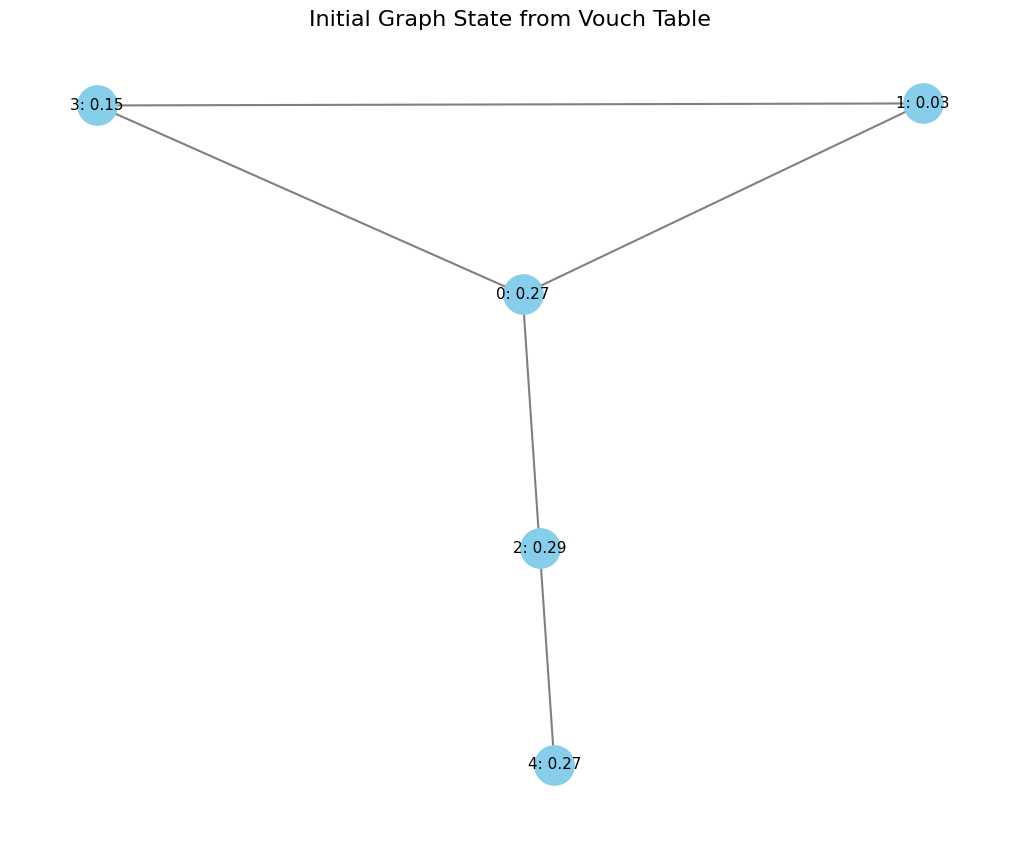

In [4]:
print("Generating graph from the SYMMETRIC vouch table...")
sym_graph = generate_graph_from_vouch_table(sym_vouch_table, sym_balance_list, is_directed=False)

### 3.2. Visualize the Asymmetric Graph

For the asymmetric table, we create a **directed graph** to represent the one-way vouches.

Generating graph from the ASYMMETRIC vouch table...

--- Initial Graph State from Vouch Table ---
Node 0  | Score: 0.2920  | Neighbors: [1, 2, 3, 4]
Node 1  | Score: 0.3650  | Neighbors: [0, 3]
Node 2  | Score: 0.1277  | Neighbors: [0, 1, 3, 4]
Node 3  | Score: 0.0766  | Neighbors: [0, 4]
Node 4  | Score: 0.1387  | Neighbors: [3]
Total Score Sum: 1.00
------------------------------------------


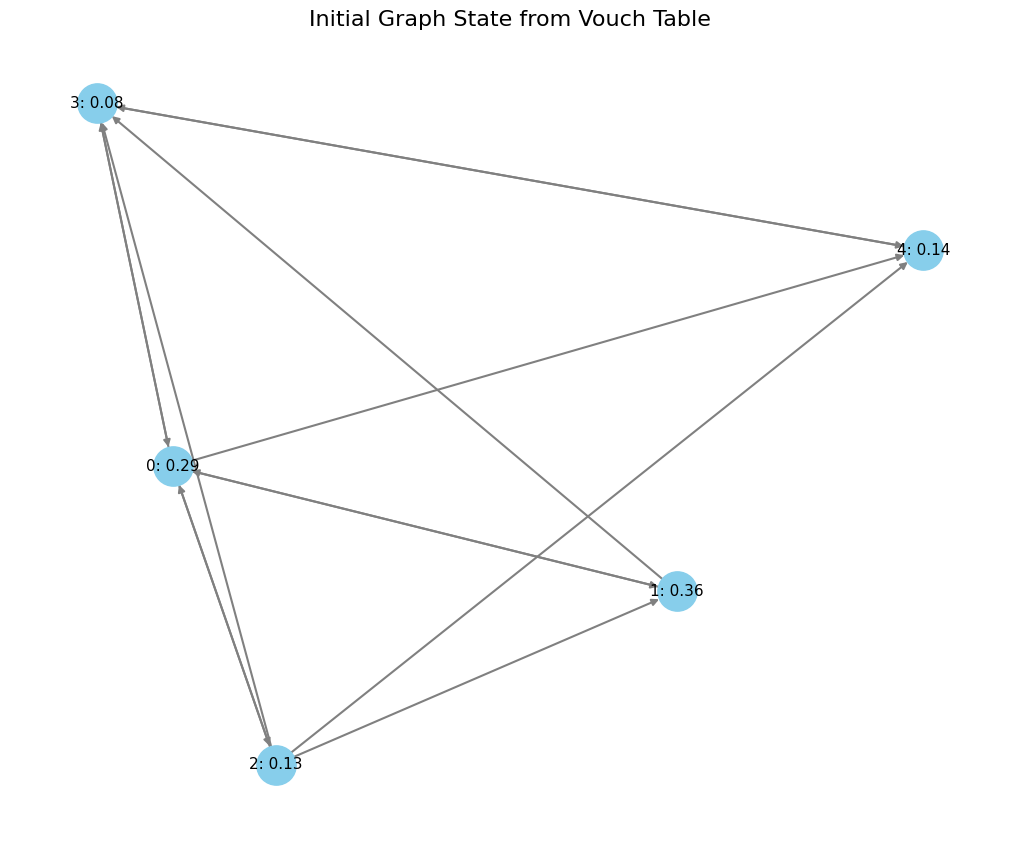

In [5]:
print("Generating graph from the ASYMMETRIC vouch table...")
asym_graph = generate_graph_from_vouch_table(asym_vouch_table, asym_balance_list, is_directed=True)